<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-17 08:31:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.2MB/s    in 3.4s    

2025-07-17 08:31:16 (59.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 142.7 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 148.7 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


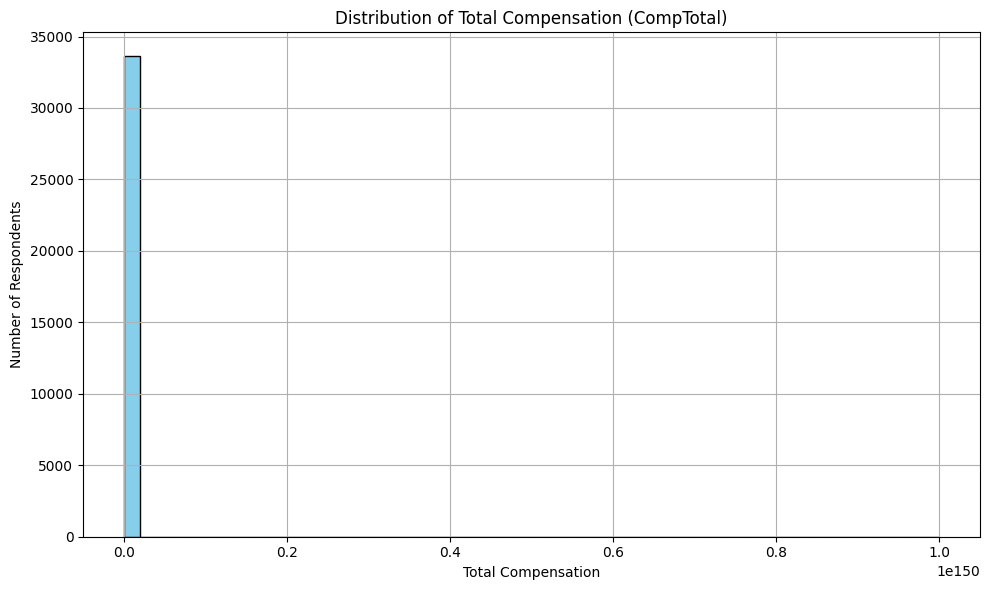

In [10]:
query = """
SELECT CompTotal FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


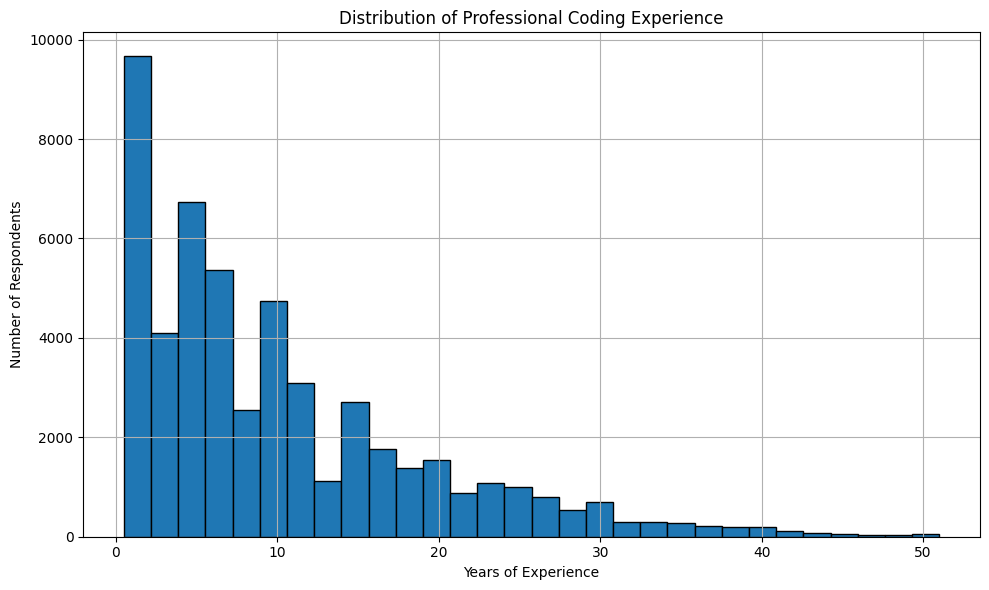

In [11]:
query = """
SELECT YearsCodePro FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


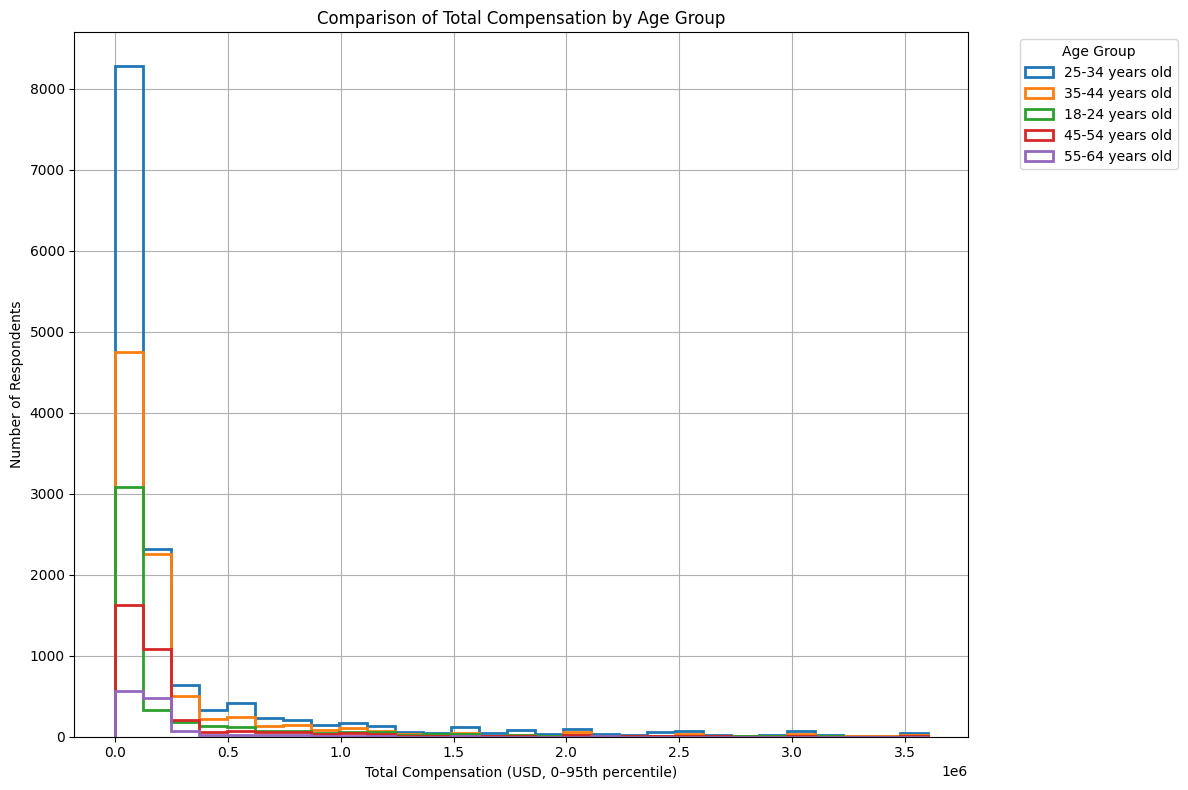

In [22]:
import numpy as np
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND CompTotal IS NOT NULL
  AND CompTotal > 0
"""
df_age_comp = pd.read_sql_query(query, conn)

age_bins = df_age_comp['Age'].value_counts().head(5).index.tolist()

upper = df_age_comp['CompTotal'].quantile(0.95)
bins = np.linspace(0, upper, 30)

plt.figure(figsize=(12, 8))
for age in age_bins:
    data = df_age_comp[df_age_comp['Age'] == age]['CompTotal']
    plt.hist(
        data,
        bins=bins,
        histtype='step',
        linewidth=2,
        label=age
    )

plt.title('Comparison of Total Compensation by Age Group')
plt.xlabel('Total Compensation (USD, 0–95th percentile)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


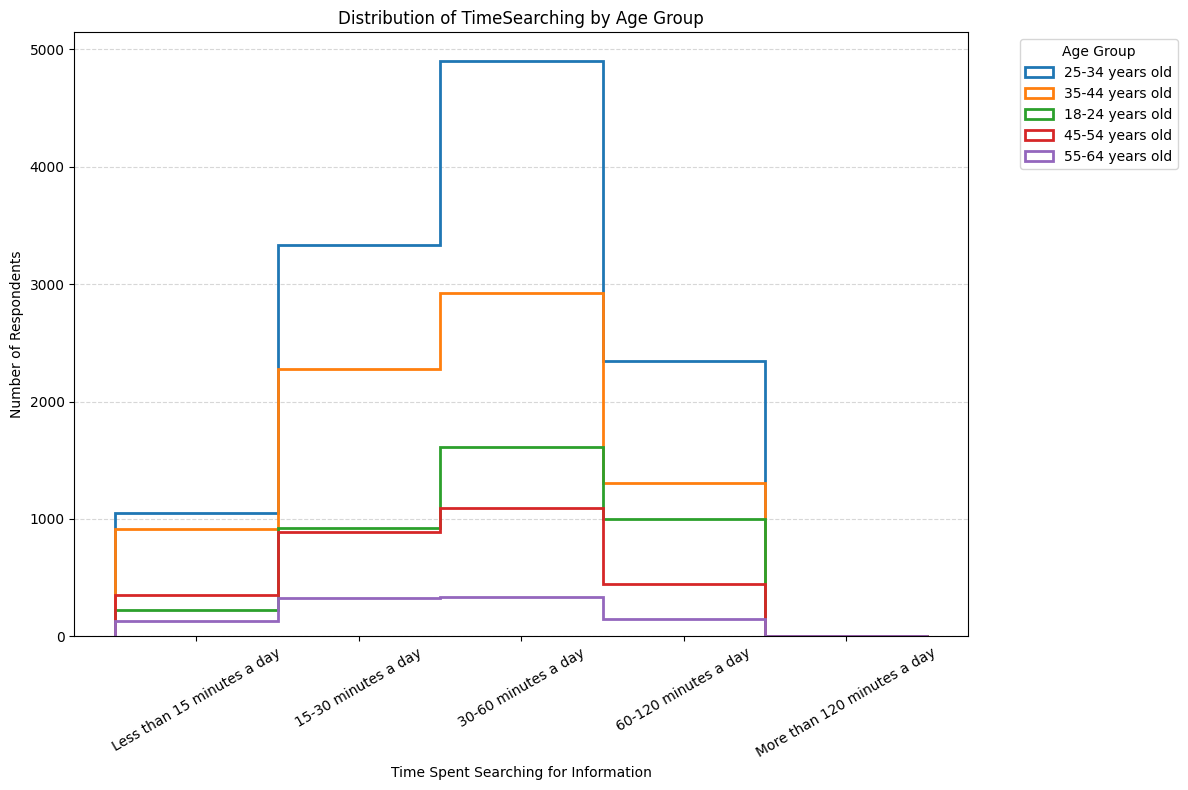

In [23]:
query = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL
  AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

time_order = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'More than 120 minutes a day': 5
}
df['TimeSearchingNum'] = df['TimeSearching'].map(time_order)

age_bins = df['Age'].value_counts().head(5).index.tolist()

bins = np.arange(1, 7) - 0.5
labels = [k for k,v in sorted(time_order.items(), key=lambda x: x[1])]

plt.figure(figsize=(12, 8))
for age in age_bins:
    subset = df.loc[df['Age'] == age, 'TimeSearchingNum']
    plt.hist(subset,
             bins=bins,
             histtype='step',
             linewidth=2,
             label=age)

plt.xticks(list(time_order.values()), labels, rotation=30)
plt.xlabel('Time Spent Searching for Information')
plt.ylabel('Number of Respondents')
plt.title('Distribution of TimeSearching by Age Group')
plt.legend(title='Age Group', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


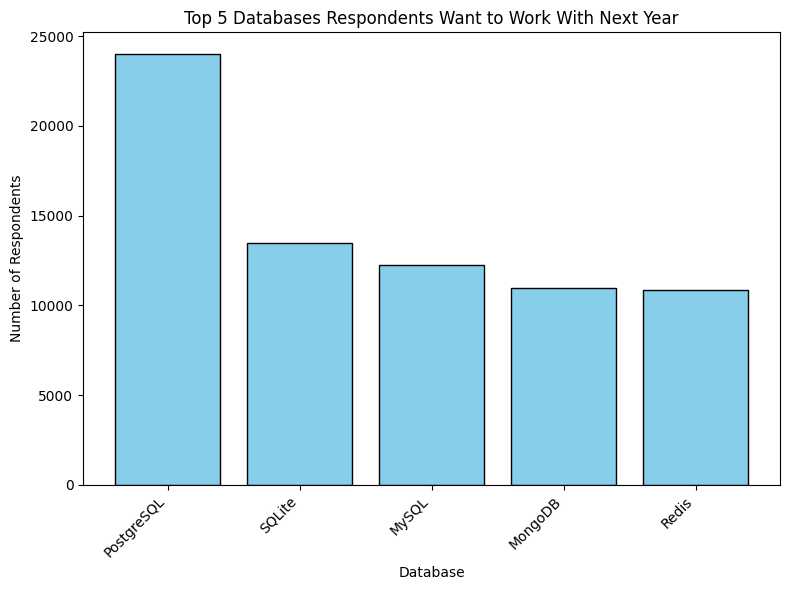

In [24]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

dbs = (
    df['DatabaseWantToWorkWith']
      .str.split(';')
      .explode()
      .str.strip()
)

top5 = dbs.value_counts().head(5)

plt.figure(figsize=(8, 6))
plt.bar(top5.index, top5.values, color='skyblue', edgecolor='black')
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


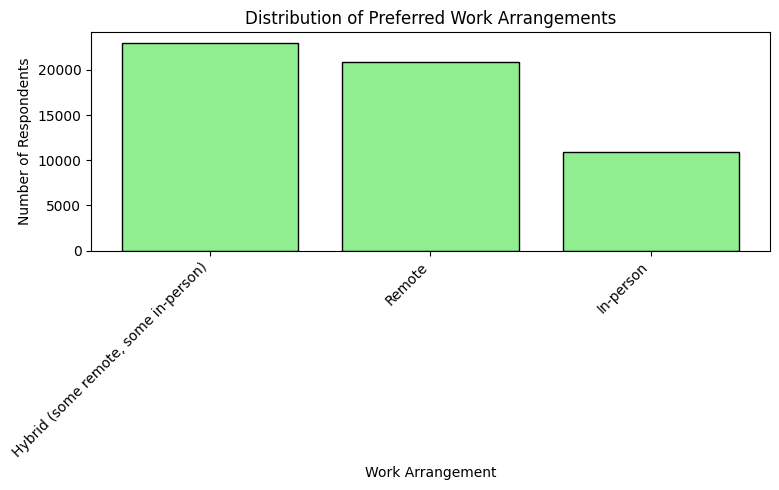

In [25]:
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_remote = pd.read_sql_query(query, conn)

remote_counts = df_remote['RemoteWork'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(remote_counts.index, remote_counts.values, color='lightgreen', edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


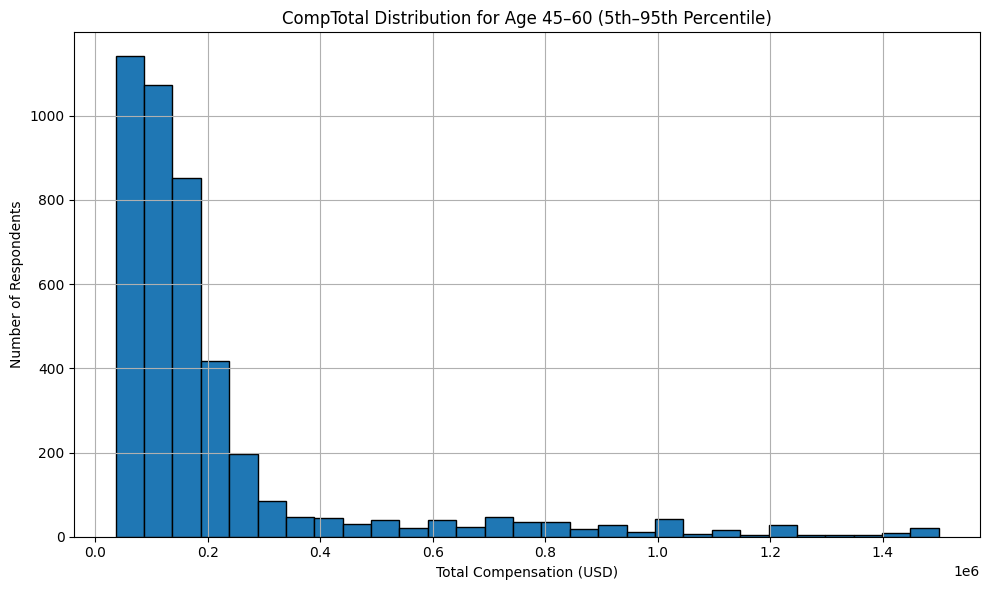

In [28]:
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND CompTotal IS NOT NULL
  AND CompTotal > 0
"""
df = pd.read_sql_query(query, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_map)

df_mid = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

comp = df_mid['CompTotal']
p5, p95 = comp.quantile([0.05, 0.95])

bins = np.linspace(p5, p95, 30)

plt.figure(figsize=(10, 6))
plt.hist(comp, bins=bins, edgecolor='black')
plt.title('CompTotal Distribution for Age 45–60 (5th–95th Percentile)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


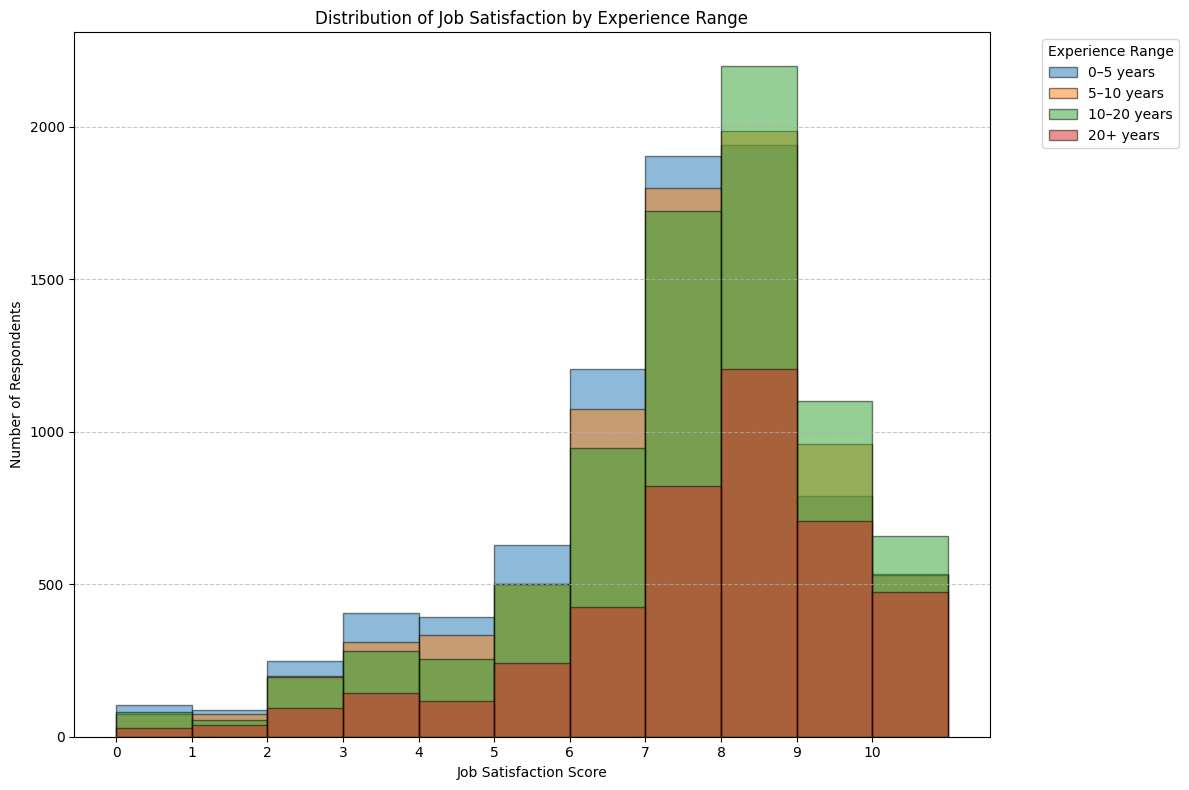

In [29]:
query = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, np.inf]
labels = ['0–5 years', '5–10 years', '10–20 years', '20+ years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

df = df.dropna(subset=['ExperienceRange', 'JobSat'])

plt.figure(figsize=(12, 8))
for label in labels:
    data = df.loc[df['ExperienceRange'] == label, 'JobSat']
    plt.hist(data, bins=range(0,12), alpha=0.5, label=label, edgecolor='black')

plt.title('Distribution of Job Satisfaction by Experience Range')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.xticks(range(0,11))
plt.legend(title='Experience Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [30]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
